# 타이타닉 생존자 예측
## 타이타닉 호 침몰 사건 당시 사망자와 생존자를 구분하는 요인을 분석함

In [284]:
# 데이터
import pandas as pd
import numpy as np
import random as rnd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [285]:
train_df=pd.read_csv("titanic.csv")

In [286]:
# 변수 보기
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


# 변수 설명

PassengerId: 승객 고유번호

Survived: 생존 여부(0 = 사망, 1 = 생존)

Pclass: 객실 등급 -> 승객의 사회적, 경제적 지위(1등석 = Upper, 2등석 = Middle, 3등석 = Lower)

Name: 이름

Sex: 성별

Age: 나이

SibSp: 동반한 형제자매(Sibling) 혹은 배우자(Spouse)의 수

Parch: 동반한 부모(Parents) 혹은 자식(Childs)의 수

Ticket: 티켓 고유번호

Fare: 티켓의 요금

Cabin: 객실 번호

Embarked: 승선한 항구 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

# 데이터분석

In [287]:
# Survived만 0 혹은 1로 표시(생존 여부)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [288]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [289]:
train_df.describe()

# 총 승객수 891명 중 38.4% 생존

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [290]:
train_df.describe(include=['O'])

# 남성수 577명
# 가장 많이 승선한 항구 Southampton

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [291]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# 객실 등급이 높을 수록 생존 확률이 높음

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [292]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# 여성이 남성보다 생존율이 훨씬 높음

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [293]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# 형제자매가 한명 있을 때 가장 생존율이 높았음

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [294]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# 마찬가지로 부모 혹은 아이와 한명 같이 있을 때 가장 생존율이 높았음
# 동행이 적으면 생존율이 높았음

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


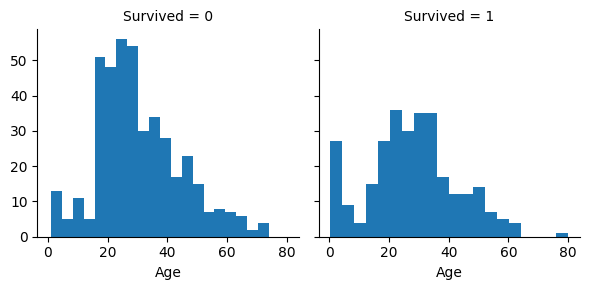

In [295]:
# 열(col)을 생존 여부로 나누어서 표 작성
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# 20~30세의 사람들의 사망율이 높음
# 유아들과 15세~25세 정도의 청년들의 생존율이 높음

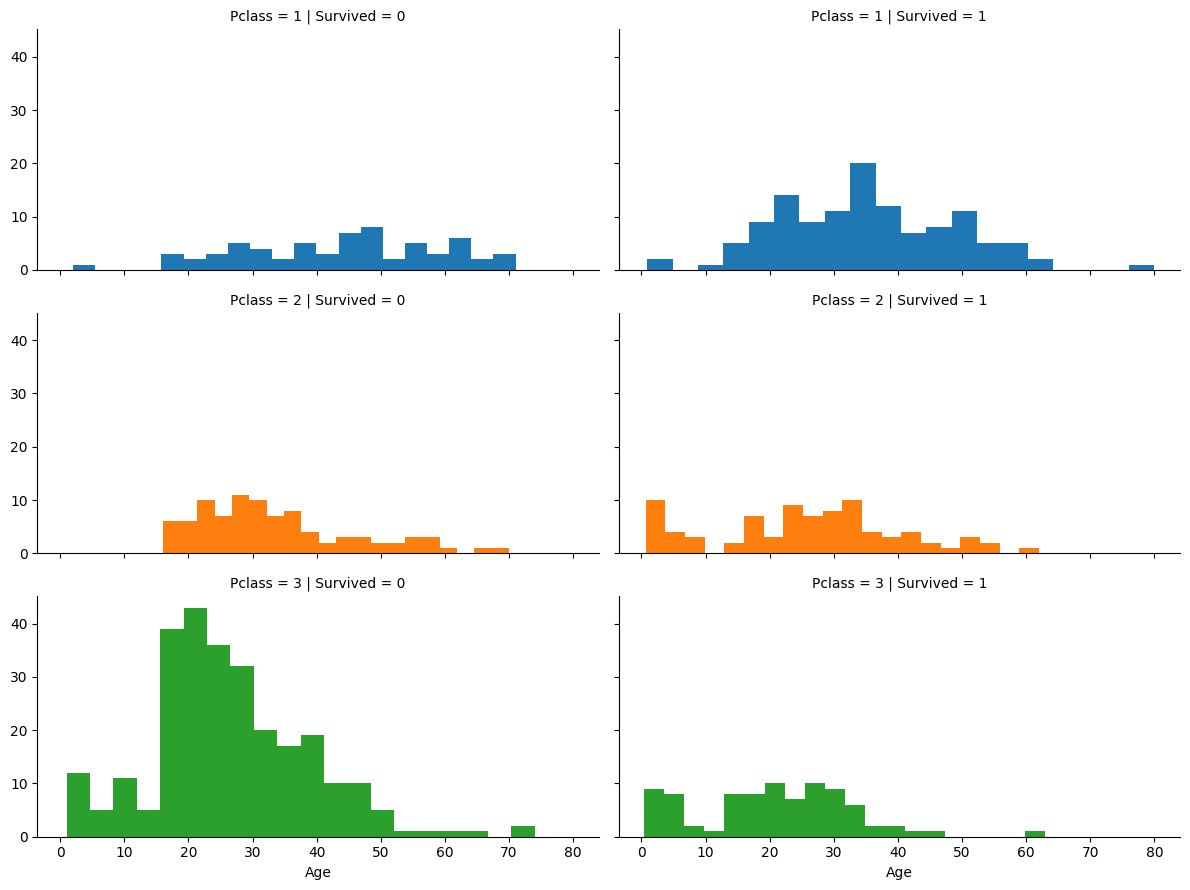

In [296]:
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 설정
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue="Pclass", height=3, aspect=2)

grid.map(plt.hist, 'Age', bins=20) 

# 1등급 객실 손님들의 생존율이 높음
# 3등급 객실 손님들의 사망율이 높음

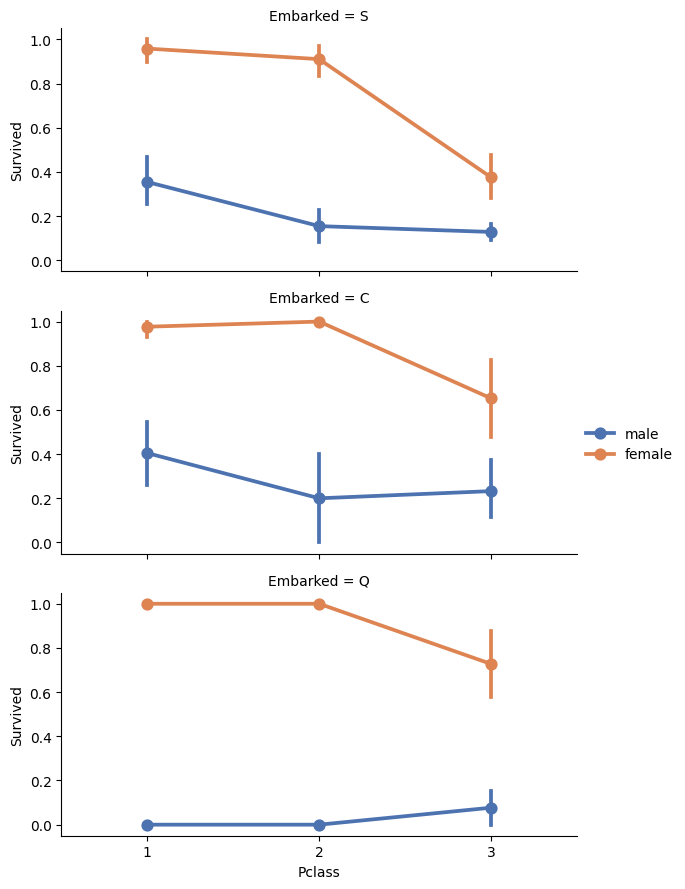

In [297]:
grid = sns.FacetGrid(train_df, row='Embarked', height=3, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])
grid.add_legend()

# 승선지가 C이고 1등급 객실을 사용할 때 남성의 생존율이 가장 높았음

# 데이터셋 분석을 위한 전처리

In [298]:
print("Before", train_df.shape)
train_df = train_df.drop(['Ticket', 'Cabin', 'Name', 'Fare', 'PassengerId'], axis=1)
print("After", train_df.shape)

# 필요 없는 데이터 삭제

Before (891, 12)
After (891, 7)


In [299]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

# 여성은 1 남성은 0으로 처리

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,S
1,1,1,1,38.0,1,0,C
2,1,3,1,26.0,0,0,S
3,1,1,1,35.0,1,0,S
4,0,3,0,35.0,0,0,S


In [300]:
train_df['families'] = train_df['SibSp'] + train_df['Parch']

train_df['alone'] = np.where(train_df['families'] > 0, 1, 0)
train_df

# 형제자매, 부모님 동승 여부를 확인하는 새로운 변수 생성

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,families,alone
0,0,3,0,22.0,1,0,S,1,1
1,1,1,1,38.0,1,0,C,1,1
2,1,3,1,26.0,0,0,S,0,0
3,1,1,1,35.0,1,0,S,1,1
4,0,3,0,35.0,0,0,S,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,S,0,0
887,1,1,1,19.0,0,0,S,0,0
888,0,3,1,NaN,1,2,S,3,1
889,1,1,0,26.0,0,0,C,0,0


In [301]:
train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [302]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df

# 승선지도 0, 1, 2로 표현

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,families,alone
0,0,3,0,22.0,1,0,0,1,1
1,1,1,1,38.0,1,0,1,1,1
2,1,3,1,26.0,0,0,0,0,0
3,1,1,1,35.0,1,0,0,1,1
4,0,3,0,35.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,0,0,0
887,1,1,1,19.0,0,0,0,0,0
888,0,3,1,NaN,1,2,0,3,1
889,1,1,0,26.0,0,0,1,0,0
